## Normal distribution and CDF

$$
  f(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

In [10]:
# The normal distribution function
def normal_distribution(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

$$
  F(x; \mu, \sigma) = \int_{-\infty}^{x} f(x; \mu, \sigma) dt
$$

In [11]:
# The CDF for a normal distribution can be computed by integrating the PDF.
# Since we don't have an analytical form for the integral of the normal distribution's PDF,
# we'll approximate the CDF by summing up the area under the curve incrementally.
def cdf_normal_distribution(x_points, mu, sigma):
    # Calculate the PDF for each x value
    pdf_values = normal_distribution(x_points, mu, sigma)
    # Approximate the CDF by cumulatively summing the PDF values and multiplying by the step size
    dx = x_points[1] - x_points[0]  # Assumption: x_points are equally spaced
    cdf_values = np.cumsum(pdf_values) * dx
    return cdf_values

In [12]:
# Parameters for the normal distribution
mu = 0     # mean
sigma = 1  # standard deviation

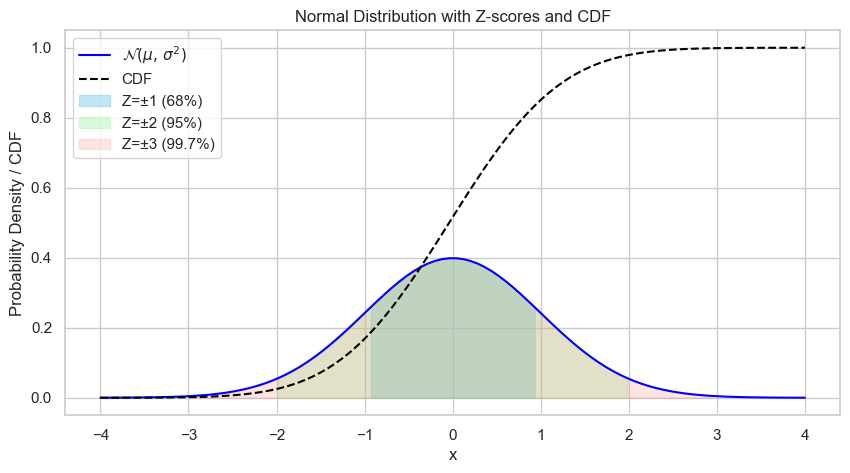

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a range of x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

# Calculate the y values based on the normal distribution function
y = normal_distribution(x, mu, sigma)

# Calculate the CDF values using our function
cdf_y = cdf_normal_distribution(x, mu, sigma)

# Plot the normal distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='$\mathcal{N}(\mu,\,\sigma^{2})$', color='blue')

# Fill the areas for Z-scores of 1, 2, and 3
plt.fill_between(x, y, where=(x >= mu - sigma) & (x <= mu + sigma), color='skyblue', alpha=0.5, label='Z=±1 (68%)')
plt.fill_between(x, y, where=(x >= mu - 2*sigma) & (x <= mu + 2*sigma), color='lightgreen', alpha=0.3, label='Z=±2 (95%)')
plt.fill_between(x, y, where=(x >= mu - 3*sigma) & (x <= mu + 3*sigma), color='salmon', alpha=0.2, label='Z=±3 (99.7%)')

# Overlay the CDF
plt.plot(x, cdf_y, label='CDF', color='black', linestyle='--')

plt.title('Normal Distribution with Z-scores and CDF')
plt.xlabel('x')
plt.ylabel('Probability Density / CDF')
plt.legend()
plt.show()